
# ***"One of the best programming skills you can have is knowing when to walk away for a while." --Oscar Godson***

# Introduction to OCR 

Optical character recognition (OCR) is a technology that enables you to convert different types of documents such as texts in images into editable and searchable data. OCR is one of the earliest addressed computer vision tasks, now there are better OCR implementations with the help of deep learning.  


![sample image 354440](https://mckessoncorp.sharepoint.com/:i:/r/sites/GRPMcKTech_DataScientists/Shared%20Documents/DS%20Mondays/Images/354440.jpg?csf=1&e=cc2uQO)

Try the Google Vision API

[Try it](https://cloud.google.com/vision/docs/drag-and-drop)


Sometimes ORC is still challenging!

e.g. underlined charater c in McKesson, possible solution: fuzzy match

Use cases or projects related to OCR:

  1. Insurance card scanner

  2. Search product by image


In [0]:
import cv2

print(cv2.__version__)

3.4.3


# **What is OpenCV**

Open source computer vision (or OpenCV) is a library of programming functions mainly aimed at real-time computer vision. OpenCV is written in C++ and its primary interface is in C++, there are bindings/wrappers in Python, Java and other languages. OpenCV includes a machine learning library that contains kNN, SVM, random forest etc., OpenCV also supports deep learning frameworks such as TensorFlow and PyTorch.

Install OpenCV Python API, which requires numpy


```
pip install opencv-python
```

if you need extra modules such as SIFT feature extraction


```
pip install opencv-contrib-python
```




Here we use OpenCV to process an image before applying Tesseract for OCR.

It is possible to do OCR using the cv2.matchTemplate() function.

e.g. credit card OCR

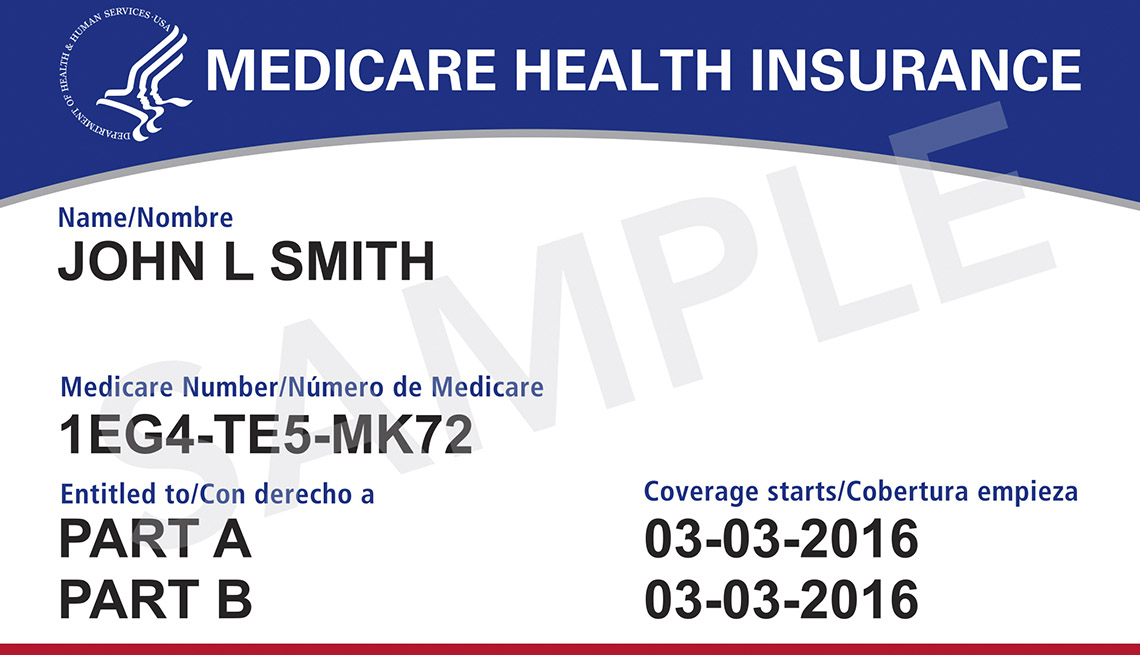

In [0]:
url = "https://cdn.aarp.net/content/dam/aarp/health/health-insurance/2018/12/1140-new-medicare-insurance-card.imgcache.rev856c51ff78ec46e63a6e402446191adc.jpg"

# scikit-image to read image from URL
from skimage import io

img = io.imread(url)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# cv2.imshow() is disabled in Google Colab
from google.colab.patches import cv2_imshow

cv2_imshow(img)


(height, width) = (655, 1140) 


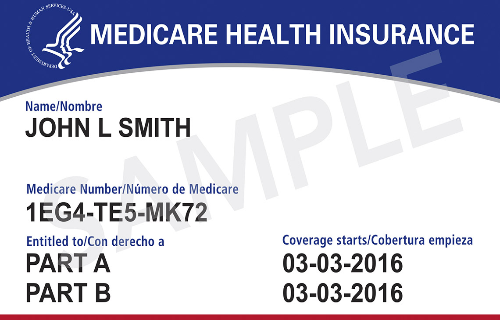

In [0]:
height, width = img.shape[:2]

print("(height, width) = ({}, {}) ".format(height, width))

resized = cv2.resize(img, (500, 320), cv2.INTER_CUBIC)

cv2_imshow(resized)

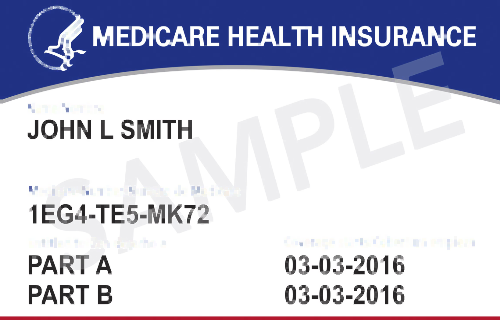

In [0]:
import numpy as np

kernel = np.ones((2, 2), np.uint8)

dilated = cv2.dilate(resized, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=2)

cv2_imshow(eroded)

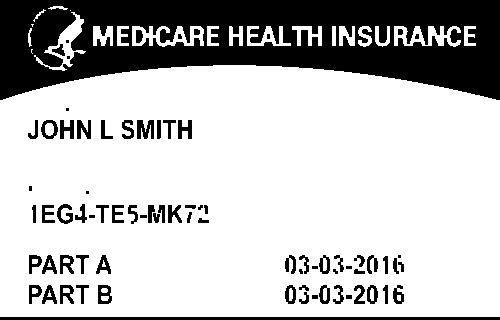

In [0]:
img_gray = cv2.cvtColor(eroded, cv2.COLOR_BGR2GRAY) 

ret1, th1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


cv2_imshow(th2)

In [0]:
!sudo apt install tesseract-ocr  # install tesseract OCR engine
!pip install pytesseract         # install tesseract python wrapper

import pytesseract

print(pytesseract.get_tesseract_version())

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,278 kB/s)
debconf: unable to initia

# **What is Tesseract**

Tesseract is an open-source OCR engine originally developed at Hewlett-Packard. In 2005 Tesseract was open sourced by HP, since 2006 it has been developed by Google. Tesseract is written in C/C++, and it has a python API. Now version 4 adds LSTM based OCR engine, which can be trained if needed.  Tesseract has unicode (UTF-8) support, and it can recognize more than 100 languages out of the box.
[Tesseract Wiki](https://github.com/tesseract-ocr/tesseract/wiki)

: eee ee

JOHN L SMITH

IEG4-TES-MKT2

PARTA 03-03-2016
PART B 03-03-2016


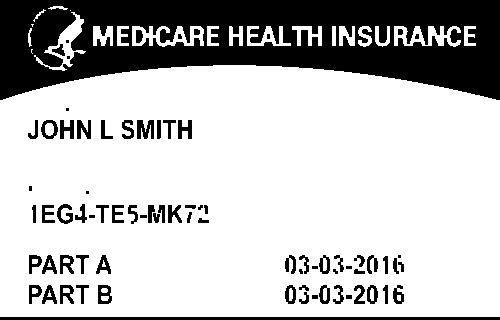

In [0]:
text = pytesseract.image_to_string(th2)

print(text)

cv2_imshow(th2)

i m4 Se a ees

NameiNombre

JOHN L SMITH

Medicare Number/Namero de Medicare

1EG4-TE5-MK72

Entitled to/Con derecho a Coverage starts/Cobertura empieza
PART A 03-03-2016

PART B 03-03-2016


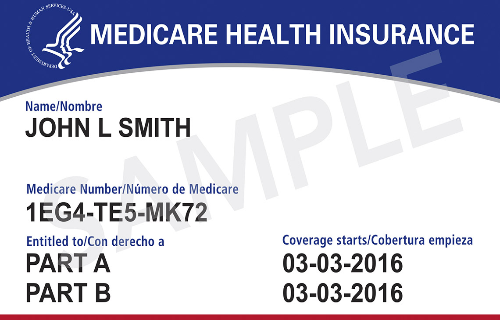

In [0]:
text = pytesseract.image_to_string(resized)

print(text)

cv2_imshow(resized)

In [0]:
from google.colab import files

uploaded = files.upload()



Saving cigna.png to cigna.png


&
9
4
ry
&
=
[2]
Fy
&

 

- Market-specifi
Cigna SureFit’ Market-specific

‘Administered by Cigna Health and Life Insurance Company
‘Coverage effective date: NW/DDICCYY

croup: 0059999
Iss (0840) Primary Care
ioe aaza2702 Soediaist
Name: John Doe wool
POP Jeremiah 8 Jonson MD

PCP phone: 888.999.1234

1D card acct name

RXBIN 600428 RxPCN 00500000
Dol


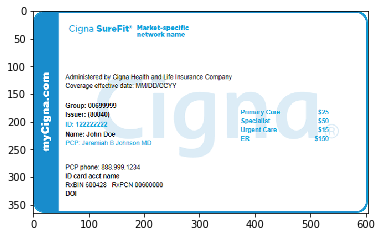

In [0]:
from PIL import Image

# change the filename of the image
pil_im = Image.open('cigna.png')

text = pytesseract.image_to_string(pil_im)

print(text)

from matplotlib.pyplot import imshow

imshow(np.asarray(pil_im))